In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad
from tqdm import tqdm
import pickle

# import dask.dataframe as dd
# import spatialdata_io
# import spatialdata
import random
random.seed(42)
np.random.seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
prj_dir = '/Users/lye1/Library/CloudStorage/OneDrive-InsideMDAnderson/01_catalyst'
#plot_dir  = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/figures/Fig6/Fig6.5/plots'
plot_dir = "/Users/lye1/todo"

In [4]:
## load data

#p46p_adata = sc.read_h5ad('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/pipelines/xenium/local/new_xenium_03052025/p46p_cellseg_new.h5ad')
p46p_adata = sc.read_h5ad(prj_dir + '/scripts/pipelines/xenium/local/new_xenium_03052025/p46p_cellseg_new.h5ad')
p46p_adata.obs = p46p_adata.obs.set_index('cell_id')

#p46p_cb = pd.read_parquet('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/raw/xenium/20250305__175222__AkdemirLab_gbm8_030525/output-XETG00091__0053577__Region_2__20250305__175253/cell_boundaries.parquet').\
#    set_index('cell_id')
p46p_cb = pd.read_parquet(prj_dir + '/data/raw/xenium/20250305__175222__AkdemirLab_gbm8_030525/output-XETG00091__0053577__Region_2__20250305__175253/cell_boundaries.parquet').\
    set_index('cell_id')
p46p_cb = p46p_cb[p46p_cb.index.isin(p46p_adata.obs_names)]

#p67p_adata = sc.read_h5ad('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/scripts/pipelines/xenium/local/new_xenium_03052025/p67p_cellseg_new.h5ad')
p67p_adata = sc.read_h5ad(prj_dir + '/scripts/pipelines/xenium/local/new_xenium_03052025/p67p_cellseg_new.h5ad')
p67p_adata.obs = p67p_adata.obs.set_index('cell_id')
#p67p_cb = pd.read_parquet('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/raw/xenium/20250305__175222__AkdemirLab_gbm8_030525/output-XETG00091__0053577__Region_1__20250305__175252/cell_boundaries.parquet').\
#    set_index('cell_id')
p67p_cb = pd.read_parquet(prj_dir + '/data/raw/xenium/20250305__175222__AkdemirLab_gbm8_030525/output-XETG00091__0053577__Region_1__20250305__175252/cell_boundaries.parquet').\
    set_index('cell_id')
p67p_cb = p67p_cb[p67p_cb.index.isin(p67p_adata.obs_names)]

#p46p_transcript_file = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/raw/xenium/20250305__175222__AkdemirLab_gbm8_030525/output-XETG00091__0053577__Region_2__20250305__175253/transcripts.parquet'
#p67p_transcript_file = '/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/raw/xenium/20250305__175222__AkdemirLab_gbm8_030525/output-XETG00091__0053577__Region_1__20250305__175252/transcripts.parquet'
p46p_transcript_file = prj_dir+'/data/raw/xenium/20250305__175222__AkdemirLab_gbm8_030525/output-XETG00091__0053577__Region_2__20250305__175253/transcripts.parquet'
p67p_transcript_file = prj_dir+'/data/raw/xenium/20250305__175222__AkdemirLab_gbm8_030525/output-XETG00091__0053577__Region_1__20250305__175252/transcripts.parquet'



In [5]:

def filter_transcripts(transcript_file, adata):
    transcripts = pd.read_parquet(transcript_file)
    return transcripts[
        # (~transcripts['feature_name'].str.startswith('BLANK')) & 
        # (~transcripts['feature_name'].str.startswith('DeprecatedCodeword')) &
        # (~transcripts['feature_name'].str.startswith('NegControlCodeword')) &
        # (~transcripts['feature_name'].str.startswith('NegControlProbe')) &
        (transcripts['qv'] >= 20) &
        (transcripts['cell_id'].isin(adata.obs_names))
    ]

p46p_transcripts = filter_transcripts(p46p_transcript_file, p46p_adata)
p67p_transcripts = filter_transcripts(p67p_transcript_file, p67p_adata)


In [6]:
#p46p_nucleusboundaris = pd.read_parquet('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/raw/xenium/20250305__175222__AkdemirLab_gbm8_030525/output-XETG00091__0053577__Region_2__20250305__175253/nucleus_boundaries.parquet')
#p67p_nucleusboundaris = pd.read_parquet('/Users/bzhao2/Library/CloudStorage/OneDrive-InsideMDAnderson/akdemirlab-projects/01_catalyst/data/raw/xenium/20250305__175222__AkdemirLab_gbm8_030525/output-XETG00091__0053577__Region_1__20250305__175252/nucleus_boundaries.parquet')
p46p_nucleusboundaris = pd.read_parquet(prj_dir+'/data/raw/xenium/20250305__175222__AkdemirLab_gbm8_030525/output-XETG00091__0053577__Region_2__20250305__175253/nucleus_boundaries.parquet')
p67p_nucleusboundaris = pd.read_parquet(prj_dir+'/data/raw/xenium/20250305__175222__AkdemirLab_gbm8_030525/output-XETG00091__0053577__Region_1__20250305__175252/nucleus_boundaries.parquet')

In [116]:
# from shapely.geometry import Polygon
# import geopandas as gpd

# def convert_to_polygons(cell_boundaries):
#     polygons = []
#     for cell_id, boundary in cell_boundaries.groupby('cell_id'):
#         # Assuming the boundary is a list of (x, y) tuples
#         polygon = Polygon(zip(boundary['vertex_x'], boundary['vertex_y']))
#         polygons.append({'cell_id': cell_id, 'geometry': polygon})
#     polygons = gpd.GeoDataFrame(polygons)
#     return polygons

# p46p_cb_gdf = convert_to_polygons(p46p_cellboundraries)
# p67p_polygons = convert_to_polygons(p67p_cb)

In [7]:
# ## find points within radius
# from scipy.spatial import KDTree
# from tqdm import tqdm

# def find_close_pairs(points, radius=1.0, min_neighbors=None):
#     """
#     Find pairs of points within a given radius using KD-tree.
    
#     Args:
#         points: numpy array of shape (n, 2) containing 2D points
#         radius: float, the maximum distance between pairs of points
        
#     Returns:
#         list of tuples (i, j, dist) where i,j are point indices and dist is their distance
#     """
#     kdtree = KDTree(points)
#     # This returns a list of lists where clusters[i] contains indices of all points within radius of point i
#     clusters = kdtree.query_ball_tree(kdtree, r=radius)
    
#     # Process the results to get unique pairs with at least 3 neighbors per point
#     close_pairs = []
#     for i, neighbors in enumerate(clusters):
#         # # Skip points with less than min_neighbors (excluding self)
#         if min_neighbors is not None and len(neighbors) < min_neighbors+1: # because neighbors includes self
#             continue
#         # Only consider neighbors with index greater than i to avoid duplicates
#         filtered_neighbors = [j for j in neighbors if j > i]
#         close_pairs.append(filtered_neighbors)
#     return close_pairs


# def find_points_within_radius(transcripts, gene='EGFR', radius=1, min_transcripts = 30, min_neighbors=None, three_dim=False):

#     result = {}
#     gene_transcripts = transcripts[transcripts['feature_name'] == gene]
    
#     for cell_id, group in tqdm(gene_transcripts.groupby('cell_id'), desc="Processing cells"):
#         if three_dim:
#             points = group[['x_location', 'y_location', 'z_location']].values
#         else:
#             points = group[['x_location', 'y_location']].values
#         # Skip cells with too few transcripts
#         if len(points) < min_transcripts:
#             continue
#         result[cell_id] = find_close_pairs(points, radius=radius, min_neighbors=min_neighbors)
        
#     return result

# from collections import Counter
# def summarize_results(res_dict):
#     result_df = []
#     for key in res_dict.keys():
#         size_count = Counter([len(x) for x in res_dict[key]])
#         size_df = pd.DataFrame({
#             'cell_id': key,
#             'cluster_size': list(size_count.keys()),
#             'frequency': list(size_count.values())
#         })
#         result_df.append(size_df)
#     return pd.concat(result_df)




#####################################################
#### rewrite the function to get the unique neighbors
#####################################################
from scipy.spatial import KDTree

def find_close_pairs(transcript_df, radius=1.0, min_neighbors=None):
    """
    Find pairs of points within a given radius using KD-tree.
    
    Args:
        points: numpy array of shape (n, 2) containing 2D points
        radius: float, the maximum distance between pairs of points
        
    Returns:
        list of tuples (i, j, dist) where i,j are point indices and dist is their distance
    """
    points = transcript_df[['x_location', 'y_location']].values
    transcripts_id = transcript_df['transcript_id'].values
    cell_id = transcript_df['cell_id'].values[0]
    kdtree = KDTree(points)
    # This returns a list of lists where clusters[i] contains indices of all points within radius of point i
    clusters = kdtree.query_ball_tree(kdtree, r=radius)
    
    # Process the results to get unique pairs with at least 3 neighbors per point
    all_neighbors_res = []
    unique_neighbors_res = []

    for i, neighbors in enumerate(clusters):
        # Skip points with less than min_neighbors (excluding self)
        if min_neighbors is not None and len(neighbors) < min_neighbors + 1:  # because neighbors includes self
            continue
        # keep neighbors for each transcripts
        all_neighbors = ','.join([str(transcripts_id[j]) for j in neighbors if j != i]) # exclude self
        all_neighbors_res.append(all_neighbors)
        # Only consider neighbors with index greater than i to avoid duplicates
        unique_neighbors = ','.join([str(transcripts_id[j]) for j in neighbors if j > i])
        unique_neighbors_res.append(unique_neighbors)
    
    # Add neighbors as one column of group dataframe
    transcript_df['all_neighbors'] = all_neighbors_res
    transcript_df['unique_neighbors'] = unique_neighbors_res
        
    return transcript_df


def find_points_within_radius(transcripts, gene='EGFR', radius=1, min_transcripts = 30, min_neighbors=None):

    result = []
    gene_transcripts = transcripts[transcripts['feature_name'] == gene]
    for cell_id, group in tqdm(gene_transcripts.groupby('cell_id'), desc="Processing cells"):
        # Skip cells with too few transcripts
        if len(group) < min_transcripts:
            continue
        result.append(find_close_pairs(group, radius=radius, min_neighbors=min_neighbors))
    result_df = pd.concat(result)
    result_df['neighbor_counts'] = result_df['all_neighbors'].apply(lambda x: len(x.split(',')) if x != '' else 0)
    result_df['unique_neighbor_counts'] = result_df['unique_neighbors'].apply(lambda x: len(x.split(',')) if x != '' else 0)
    
    return result_df



In [8]:
p46p_egfr_clustered_transcripts = find_points_within_radius(p46p_transcripts, gene='EGFR', min_transcripts=4)
p46p_egfr_clustered_transcripts['cell_type'] = p46p_egfr_clustered_transcripts['cell_id'].map(p46p_adata.obs['cell_type_max_gene_score'].to_dict())

p67p_egfr_clustered_transcripts = find_points_within_radius(p67p_transcripts, gene='EGFR', min_transcripts=4)
p67p_egfr_clustered_transcripts['cell_type'] = p67p_egfr_clustered_transcripts['cell_id'].map(p67p_adata.obs['cell_type_max_gene_score'].to_dict())

Processing cells: 100%|██████████| 133987/133987 [00:09<00:00, 13624.68it/s]


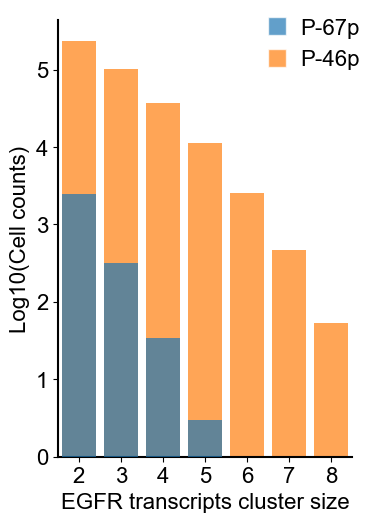

In [50]:
## all neighbors
p46p_egfr_res = p46p_egfr_clustered_transcripts.groupby(['cell_id', 'neighbor_counts']).size().to_frame(name='counts').reset_index()
p46p_egfr_res['sample'] = 'p46P'
p67p_egfr_res = p67p_egfr_clustered_transcripts.groupby(['cell_id', 'neighbor_counts']).size().to_frame(name='counts').reset_index()
p67p_egfr_res['sample'] = 'p67P'
ddf = pd.concat([p46p_egfr_res, p67p_egfr_res])
ddf.rename(columns={'neighbor_counts': 'cluster_size'}, inplace=True)

plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
import matplotlib.pyplot as plt
# palette= ['lightgreen', 'rosybrown']
# Plot the histograms with transparency and overlapping bars
fig, ax = plt.subplots(figsize=(4, 5.5))
for i, sample in enumerate(['p67P','p46P']):
    data = ddf[(ddf['sample'] == sample) & (ddf['cluster_size'] > 1)]
    cell_counts = data.groupby('cluster_size')['cell_id'].nunique()
    ax.bar(cell_counts.index, np.log10(cell_counts.values), alpha=0.7, color=plt.cm.tab10(i), label=sample, zorder=3-i)
    # ax.plot(cell_counts.index, np.log10(cell_counts.values), alpha=0.7, linewidth=3, markersize=8, color=plt.cm.tab10(i), label=sample, marker='o', zorder=i+1)
    ax.set_xticks(ticks=range(1, 10))
    ax.set_xticklabels(labels=range(1, 10))
ax.set_xlabel('EGFR transcripts cluster size')
ax.set_ylabel('Log10(Cell counts)')
ax.set_xlim(1.5, 8.5)
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_handles = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=plt.cm.tab10(0), alpha=0.7, markersize=13, label='P-67p'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=plt.cm.tab10(1), alpha=0.7, markersize=13, label='P-46p')
]
ax.legend(handles=legend_handles, title='', bbox_to_anchor=(0.6, 1.05), loc='upper left', frameon=False, ncol=1, columnspacing=0.1, handletextpad=0.05)

plt.tight_layout()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
plt.savefig(f'{plot_dir}/p46p_p67p_cluster_size_counts_all_neighbors.png', dpi=300, bbox_inches='tight')
plt.show()

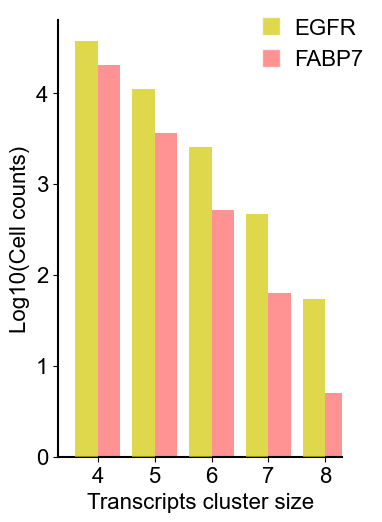

In [72]:
##yelingqun
## all neighbors
p46p_egfr_res = p46p_egfr_clustered_transcripts.groupby(['cell_id', 'neighbor_counts']).size().to_frame(name='counts').reset_index()
p46p_egfr_res['sample'] = 'egfr'
p46p_fabp7_res = p46p_fabp7_clustered_transcripts.groupby(['cell_id', 'neighbor_counts']).size().to_frame(name='counts').reset_index()
p46p_fabp7_res['sample'] = 'fabp7'
ddf = pd.concat([p46p_egfr_res, p46p_fabp7_res])
ddf.rename(columns={'neighbor_counts': 'cluster_size'}, inplace=True)

plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
import matplotlib.pyplot as plt
# palette= ['lightgreen', 'rosybrown']
# Plot the histograms with transparency and overlapping bars
fig, ax = plt.subplots(figsize=(4, 5.5))
width=0.4
multiplier = 0
color = ['#D2C800', '#FF6464']
for i, sample in enumerate(['egfr','fabp7']):
    offset = width * multiplier
    data = ddf[(ddf['sample'] == sample) & (ddf['cluster_size'] > 3)]
    cell_counts = data.groupby('cluster_size')['cell_id'].nunique()
    ax.bar(cell_counts.index + offset, np.log10(cell_counts.values), width, alpha=0.7, color=color[i], label=sample, zorder=3-i)
    # ax.plot(cell_counts.index, np.log10(cell_counts.values), alpha=0.7, linewidth=3, markersize=8, color=plt.cm.tab10(i), label=sample, marker='o', zorder=i+1)
    ax.set_xticks(ticks=range(1, 10))
    ax.set_xticklabels(labels=range(1, 10))
    multiplier += 1
ax.set_xlabel('Transcripts cluster size')
ax.set_ylabel('Log10(Cell counts)')
ax.set_xlim(3.5, 8.5)
ax.set_xticks(cell_counts.index + width/2, cell_counts.index)
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_handles = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color[0], alpha=0.7, markersize=13, label='EGFR'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color[1], alpha=0.7, markersize=13, label='FABP7')
]
ax.legend(handles=legend_handles, title='', bbox_to_anchor=(0.6, 1.05), loc='upper left', frameon=False, ncol=1, columnspacing=0.1, handletextpad=0.05)

plt.tight_layout()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
plt.savefig(f'{plot_dir}/egfr_fabp7_cluster_size_counts_all_neighbors.png', dpi=300, bbox_inches='tight')
plt.show()

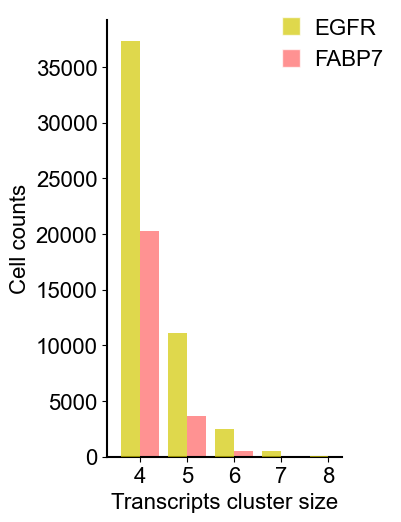

In [71]:
##yelingqun
## all neighbors
p46p_egfr_res = p46p_egfr_clustered_transcripts.groupby(['cell_id', 'neighbor_counts']).size().to_frame(name='counts').reset_index()
p46p_egfr_res['sample'] = 'egfr'
p46p_fabp7_res = p46p_fabp7_clustered_transcripts.groupby(['cell_id', 'neighbor_counts']).size().to_frame(name='counts').reset_index()
p46p_fabp7_res['sample'] = 'fabp7'
ddf = pd.concat([p46p_egfr_res, p46p_fabp7_res])
ddf.rename(columns={'neighbor_counts': 'cluster_size'}, inplace=True)

plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
import matplotlib.pyplot as plt
# palette= ['lightgreen', 'rosybrown']
# Plot the histograms with transparency and overlapping bars
fig, ax = plt.subplots(figsize=(4, 5.5))
width=0.4
multiplier = 0
color = ['#D2C800', '#FF6464']
for i, sample in enumerate(['egfr','fabp7']):
    offset = width * multiplier
    data = ddf[(ddf['sample'] == sample) & (ddf['cluster_size'] > 3)]
    cell_counts = data.groupby('cluster_size')['cell_id'].nunique()
    ax.bar(cell_counts.index + offset, cell_counts.values, width, alpha=0.7, color=color[i], label=sample, zorder=3-i)
    # ax.plot(cell_counts.index, np.log10(cell_counts.values), alpha=0.7, linewidth=3, markersize=8, color=plt.cm.tab10(i), label=sample, marker='o', zorder=i+1)
    ax.set_xticks(ticks=range(1, 10))
    ax.set_xticklabels(labels=range(1, 10))
    multiplier += 1
ax.set_xlabel('Transcripts cluster size')
ax.set_ylabel('Cell counts')
ax.set_xlim(3.5, 8.5)
ax.set_xticks(cell_counts.index + width/2, cell_counts.index)
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_handles = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color[0], alpha=0.7, markersize=13, label='EGFR'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color[1], alpha=0.7, markersize=13, label='FABP7')
]
ax.legend(handles=legend_handles, title='', bbox_to_anchor=(0.6, 1.05), loc='upper left', frameon=False, ncol=1, columnspacing=0.1, handletextpad=0.05)

plt.tight_layout()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
plt.savefig(f'{plot_dir}/egfr_fabp7_cluster_size_counts_all_neighbors_no_log.png', dpi=300, bbox_inches='tight')
plt.show()

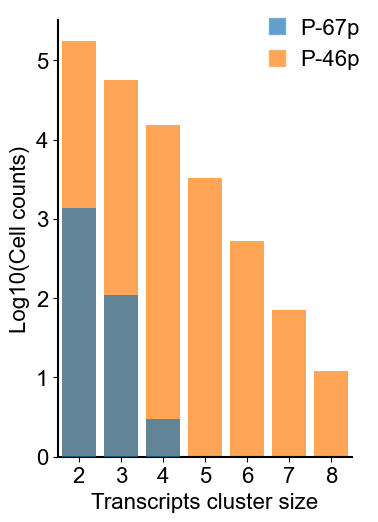

In [ ]:
## unique neighbors
p46p_egfr_res = p46p_egfr_clustered_transcripts.groupby(['cell_id', 'unique_neighbor_counts']).size().to_frame(name='counts').reset_index()
p46p_egfr_res['sample'] = 'p46P'
p67p_egfr_res = p67p_egfr_clustered_transcripts.groupby(['cell_id', 'unique_neighbor_counts']).size().to_frame(name='counts').reset_index()
p67p_egfr_res['sample'] = 'p67P'
ddf = pd.concat([p46p_egfr_res, p67p_egfr_res])
ddf.rename(columns={'unique_neighbor_counts': 'cluster_size'}, inplace=True)

plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
import matplotlib.pyplot as plt
# palette= ['lightgreen', 'rosybrown']
# Plot the histograms with transparency and overlapping bars
fig, ax = plt.subplots(figsize=(4, 5.5))
for i, sample in enumerate(['p67P','p46P']):
    data = ddf[(ddf['sample'] == sample) & (ddf['cluster_size'] > 1)]
    cell_counts = data.groupby('cluster_size')['cell_id'].nunique()
    ax.bar(cell_counts.index, np.log10(cell_counts.values), alpha=0.7, color=plt.cm.tab10(i), label=sample, zorder=3-i)
    # ax.plot(cell_counts.index, np.log10(cell_counts.values), alpha=0.7, linewidth=3, markersize=8, color=plt.cm.tab10(i), label=sample, marker='o', zorder=i+1)
    ax.set_xticks(ticks=range(1, 10))
    ax.set_xticklabels(labels=range(1, 10))
ax.set_xlabel('EGFR transcripts cluster size')
ax.set_ylabel('Log10(Cell counts)')
ax.set_xlim(1.5, 8.5)
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_handles = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=plt.cm.tab10(0), alpha=0.7, markersize=13, label='P-67p'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=plt.cm.tab10(1), alpha=0.7, markersize=13, label='P-46p')
]
ax.legend(handles=legend_handles, title='', bbox_to_anchor=(0.6, 1.05), loc='upper left', frameon=False, ncol=1, columnspacing=0.1, handletextpad=0.05)

plt.tight_layout()
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
plt.savefig(f'{plot_dir}/p46p_p67p_cluster_size_counts_unique_neighbors.png', dpi=300, bbox_inches='tight')
plt.show()